## Region analysis

### Inputs

- PAPERS_INFO/PROCESSED/JITS_AFFILIATIONS_PRO

### Outputs

- published region distributions

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode
import re
import pycountry
from matplotlib import cm

In [111]:
affils = pd.read_csv('../papers_info/processed/jits_affiliations_pro.csv')

In [112]:
groups = affils.drop_duplicates().groupby(['country', 'year', 'journal']).count().reset_index()
per_country = affils.drop_duplicates().groupby(['country']).count().reset_index().sort_values(by = 'paper_id', ascending=False)
per_country_journal = affils.drop_duplicates().groupby(['country', 'journal']).count().reset_index().sort_values(by = ['journal', 'paper_id'], ascending=False)
per_country_year = affils.drop_duplicates().groupby(['country', 'year']).count().reset_index().sort_values(by = ['journal', 'year'], ascending=False)

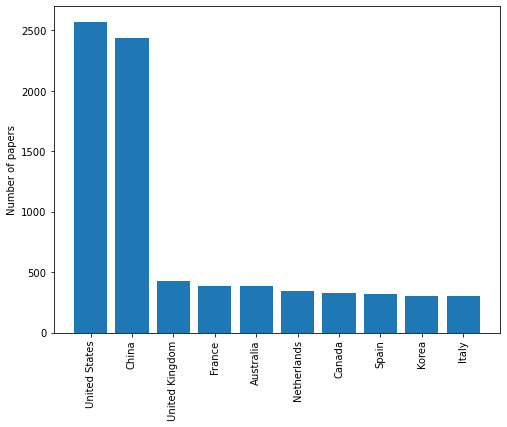

In [113]:
plt.figure(figsize=(8,6))
plt.bar(per_country.iloc[:10].country.values, per_country.iloc[:10].paper_id.values)
plt.xticks(rotation = 90)
plt.ylabel('Number of papers')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


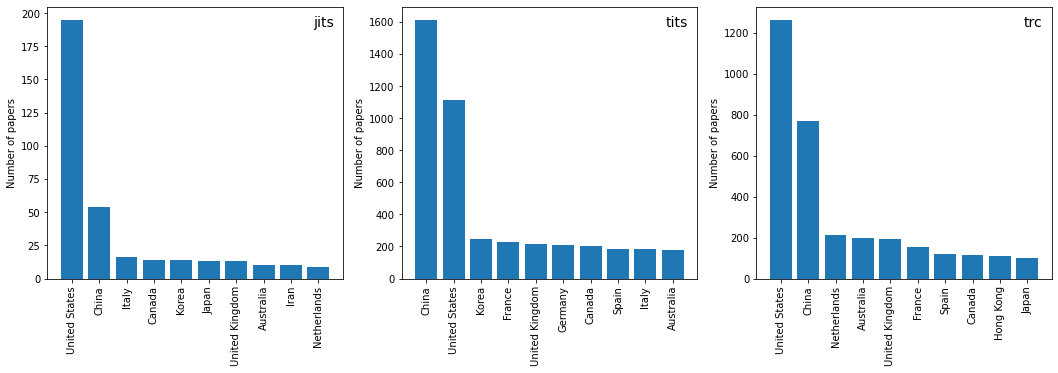

In [114]:
plt.figure(figsize=(18,5))
count = 1
for journal in ['jits']:
    plt.subplot(1, 1, count)
    plt.bar(per_country_journal[per_country_journal.journal == journal].iloc[:10].country.values, per_country_journal[per_country_journal.journal == journal].iloc[:10].paper_id.values)
    plt.xticks(rotation = 90)
    plt.ylabel('Number of papers')
    plt.legend(title = journal, loc = 'upper right', framealpha = 0, title_fontsize = 14)
    count += 1
plt.show()

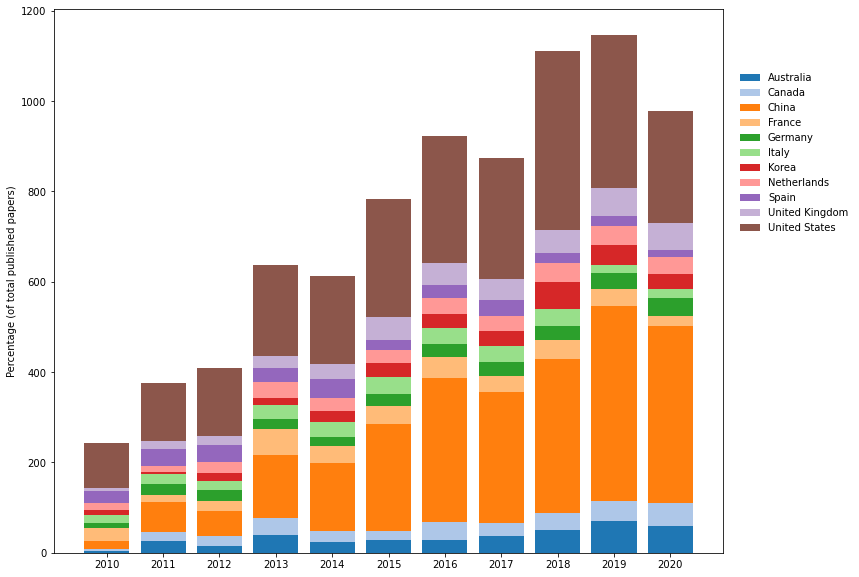

In [167]:
plt.figure(figsize=(12,10))
count = 0
top_countries = sorted(per_country.iloc[:11].country.values)
#total_paper_per_year = per_country_year[per_country_year.country.isin(top_countries)].groupby('year').sum().reset_index().paper_id.values
total_paper_per_year = per_country_year.groupby('year').sum().reset_index().paper_id.values

plot_record = {}
upper = 0

for i, country in enumerate(top_countries):
    records = {k: 0 for k in range(2010, 2021)}
    years, values = per_country_year[per_country_year.country == country].year.values, per_country_year[per_country_year.country == country].paper_id.values
    records.update({k: v for k, v in zip(years, values)})
    
    if i == 0:
        plt.bar(records.keys(), np.array(list(records.values())) , label = country, color = plt.cm.tab20(i)) #/ np.array(total_paper_per_year)
    else:
        upper += np.array(list(plot_record[i-1].values()))# / np.array(total_paper_per_year)
        plt.bar(records.keys(), np.array(list(records.values())) , label = country, color = plt.cm.tab20(i), bottom = upper) #/ np.array(total_paper_per_year)
    plot_record.update({i: records})
    

plt.xticks(range(2010,2021))
plt.ylabel('Percentage (of total published papers)')
plt.legend(loc = 'upper right', framealpha = 0, bbox_to_anchor = (1.2, 0.9))
plt.show()